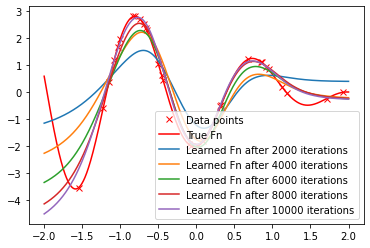

<Figure size 432x288 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))


X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

def f_th(theta, x) :
    return np.sum( theta[2*p : 3*p] * sigmoid( theta[0 : p] 
                                              * np.reshape(x,(-1,1)) 
                                              + theta[p : 2*p]), axis=1 )

def diff_f_th(theta, x) :

    u0_update = sigmoid( theta[0 : p] * np.reshape(x,(-1,1)) 
                        + theta[p : 2*p])
    b0_update = theta[2*p : 3*p] * sigmoid_prime( 
        theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p])
    a0_update = theta[2*p : 3*p] * sigmoid_prime( 
        theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]) * x
    
    theta_update = np.concatenate((a0_update.T, b0_update.T, u0_update.T))

    return np.reshape(theta_update, (-1))

xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    idx = np.random.randint(N)

    theta = theta - alpha * (f_th(theta, X[idx]) - Y[idx]) 
    * diff_f_th(theta, X[idx])

    if (k+1)%2000 == 0 :
        plt.plot(xx,f_th(theta, xx),
                 label=f'Learned Fn after {k+1} iterations')

plt.legend()
plt.show()
plt.savefig('plot.png')
